In [3]:
import sys 
sys.path.append('..')
from LRL import *

In [4]:
USE_CUDA

True

# Cartpole task

In [5]:
env = gym.make('CartPole-v0')

In [6]:
class CartpoleNN(nn.Module):
    def __init__(self, linear):
        super().__init__()
        
        self.layers = nn.Sequential(
                        linear(4, 128),
                        nn.ReLU(),
                        linear(128, 128),
                        nn.ReLU())
        
    def forward(self, x):
        return self.layers(x)

# Store experiment results

In [7]:
import time
import pandas as pd
results = pd.DataFrame(columns=["Reached 200", "Average reward", "FPS"])

In [8]:
def store_res(name, agent):
    perfect = np.nonzero(np.array(agent.logger["rewards"]) == 200)[0]
    
    results.loc[name] = [perfect[0] if len(perfect) > 0 else None,
                         np.array(agent.logger["rewards"]).mean(),
                         np.median(agent.logger["fps"])]

## Backwards DQN

With target update, which doesn't make much sense.

In [12]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_games_capacity": 50,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [13]:
agent = eGreedy(TargetQAgent(QAgent(BackwardBufferAgent)))(config)

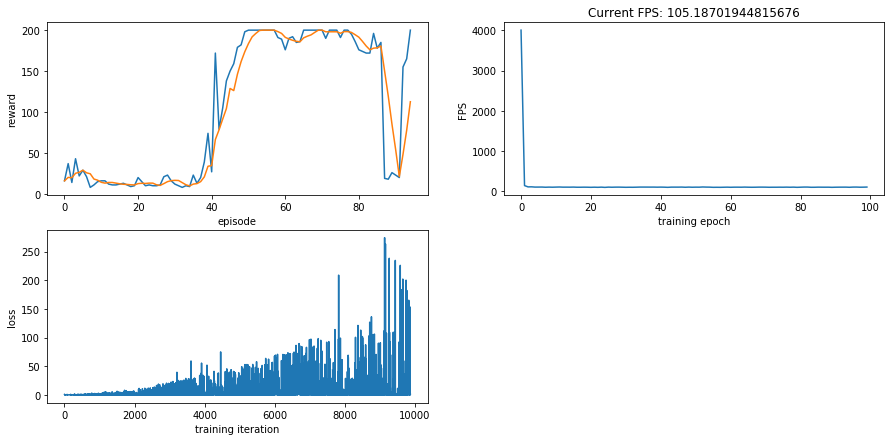

In [14]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [15]:
store_res("Backward DQN", agent)

## Pure backwards DQN

In [16]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_games_capacity": 50,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [17]:
agent = eGreedy(QAgent(BackwardBufferAgent))(config)

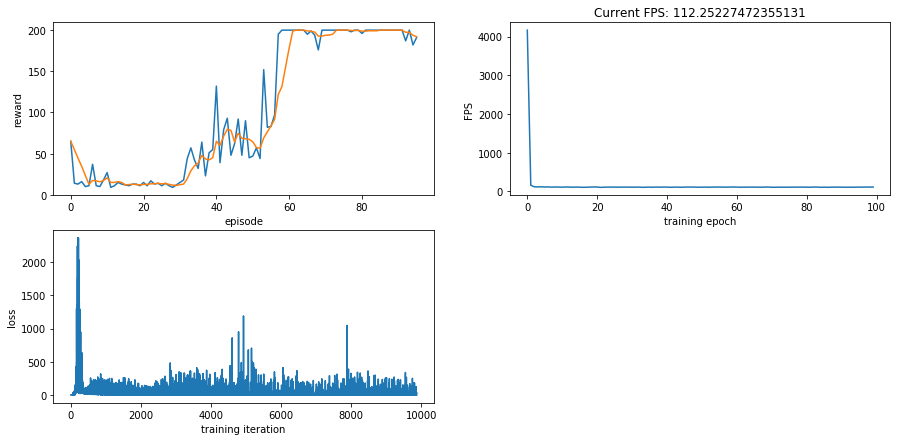

In [18]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [19]:
store_res("Pure backward DQN", agent)

## Double DQN

In [24]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [25]:
agent = eGreedy(DoubleQAgent(QAgent(ReplayBufferAgent)))(config)

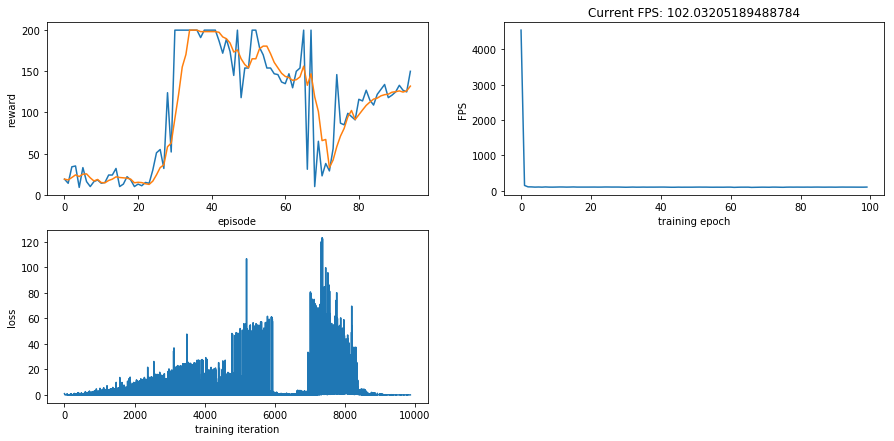

In [26]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [27]:
store_res("Double DQN", agent)

## Double DQN + Prioritized

In [32]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 100
}

In [33]:
agent = eGreedy(DoubleQAgent(QAgent(PrioritizedBufferAgent)))(config)

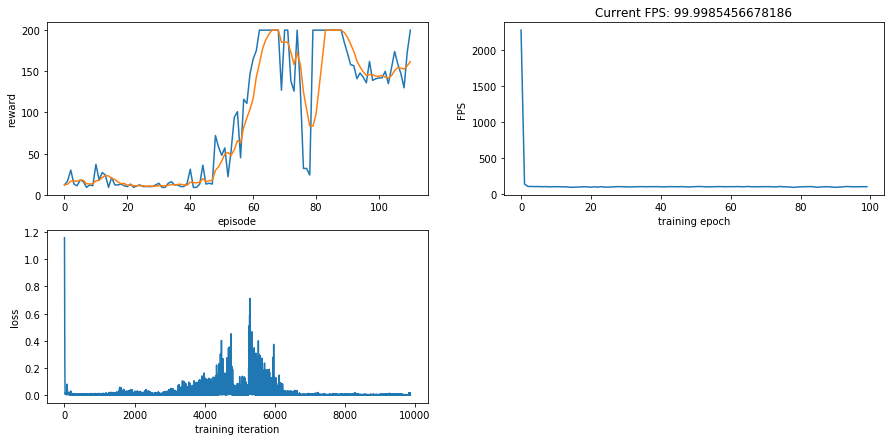

In [34]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [35]:
store_res("Prioritized Double DQN", agent)

# Categorical

In [52]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [53]:
agent = eGreedy(CategoricalQAgent(ReplayBufferAgent))(config)

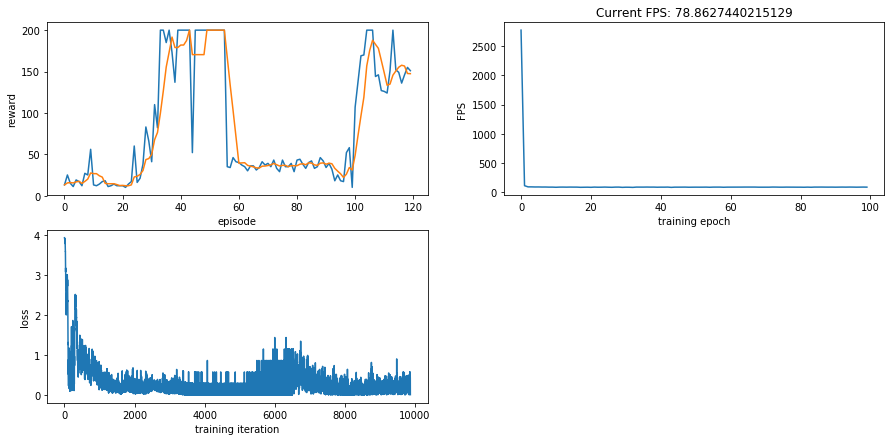

In [54]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [55]:
store_res("Categorical DQN", agent)

# Categorical Backwards

In [56]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_games_capacity": 50,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [57]:
agent = eGreedy(CategoricalQAgent(BackwardBufferAgent))(config)

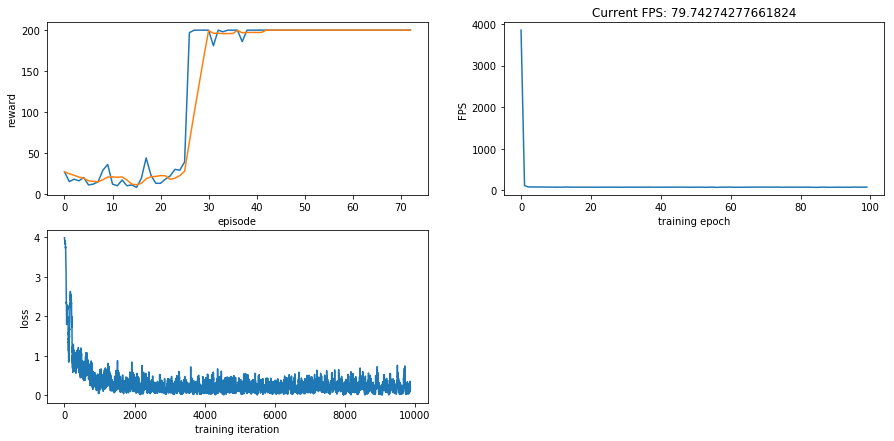

In [58]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [59]:
store_res("Categorical Backwards DQN", agent)

# QR-DQN

In [7]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "quantiles": 51
}

In [8]:
agent = eGreedy(DoubleQAgent(QuantileQAgent(ReplayBufferAgent)))(config)

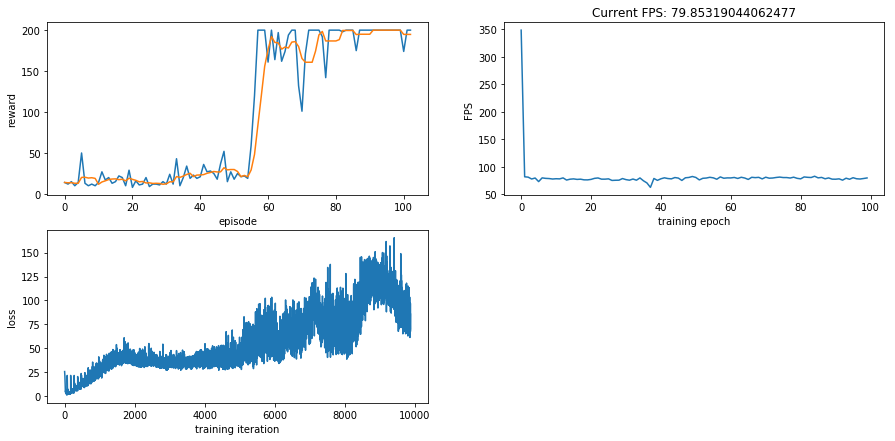

In [9]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [55]:
store_res("Quantile DQN", agent)

# RESULTS

In [84]:
results

,Reached 200,Average reward,FPS
Backward DQN,50.0,103.589470,102.609290
Pure backward DQN,58.0,102.822914,110.712171
DQN,45.0,101.958763,102.549885
Double DQN,30.0,105.147369,100.637534
Dueling Double DQN,34.0,120.256096,70.079083
Prioritized Double DQN,62.0,89.720718,99.884073
Noisy Double DQN,NaN,9.333333,43.103519
Noisy Prioritized Double DQN,132.0,55.297752,41.839491
Noisy Prioritized Dueling Double DQN,NaN,9.365511,30.855807
Categorical DQN,33.0,82.791664,79.121614


In [63]:
results  # old one

,Reached 200,Average reward,Wall clock per frame
DQN,27.0,137.90,0.018564
Double DQN,43.0,106.61,0.020188
Dueling Double DQN,41.0,146.64,0.026545
Prioritized Double DQN,58.0,90.70,0.019881
Noisy Double DQN,66.0,58.17,0.047890
Noisy Prioritized Double DQN,NaN,14.32,0.066598
Noisy Prioritized Dueling Double DQN,NaN,9.49,0.089293
Categorical DQN,23.0,123.14,0.023840
Categorical DQN with target-net,40.0,83.57,0.024900
Categorical Double DQN,28.0,76.55,0.026123


In [64]:
env.close()